# Семинар 02
## Критерии однородности

## Задание 1

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000449 0.2518000 0.5131000 0.5106000 0.7636000 0.9996000 

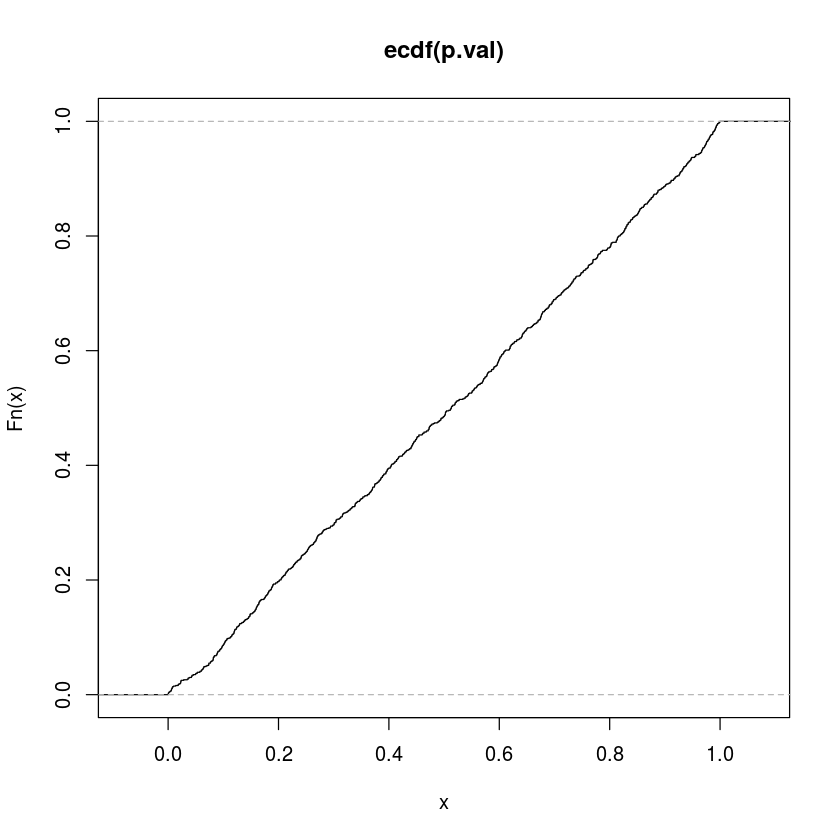

In [8]:
mean <- 0
sd <- 1
p.val <- rep(NA, 1000)

for(i in 1:1000) {
  data <- rnorm(100, mean = mean, sd = sd)
  res <- ks.test(data, "pnorm", mean = 0, sd = 1)
  p.val[i] <- res$p.value
}
summary(p.val)

plot(ecdf(p.val))

При справедливости нулевой гипотизы значение p-value имеет равномерное распределение на [0,1]

## Задание 2

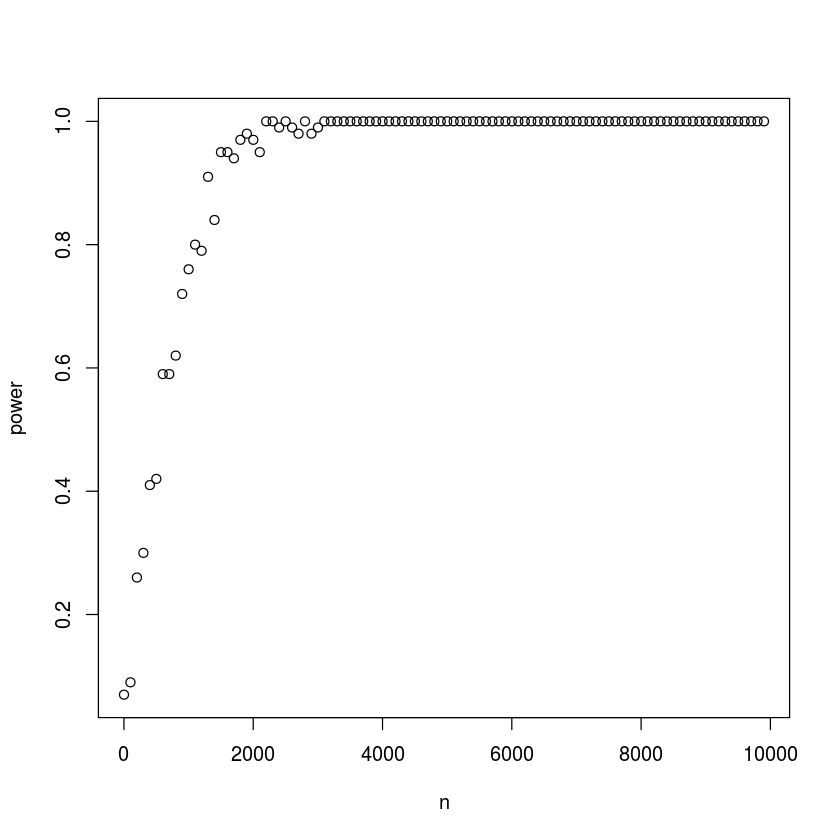

In [14]:
mean <- 0
sd <- 1
a <- 0.1
alpha <- 0.05

ns <- seq(1, 10000, 100)
h1 <- rep(0, length(ns))

for (j in 1:length(ns)) {
  for (i in 1:100) {
    data <- rnorm(ns[j], mean = a, sd = sd)
    res <- ks.test(data, "pnorm", mean = 0, sd = 1)
    if (res$p.value < alpha) {
      h1[j] <- h1[j] + 1
    }
  }
}

plot(ns, h1 / 100, ylab = "power", xlab = "n")

При увеличении размера выборки, мощность критерия растет и стремится к 1

## Задание 3

In [27]:
mean <- 0
sd <- 1
n <- 20
a <- 0.1
alphas <- seq(0.1, 1, 0.01)

### Двусторонняя альтернатива

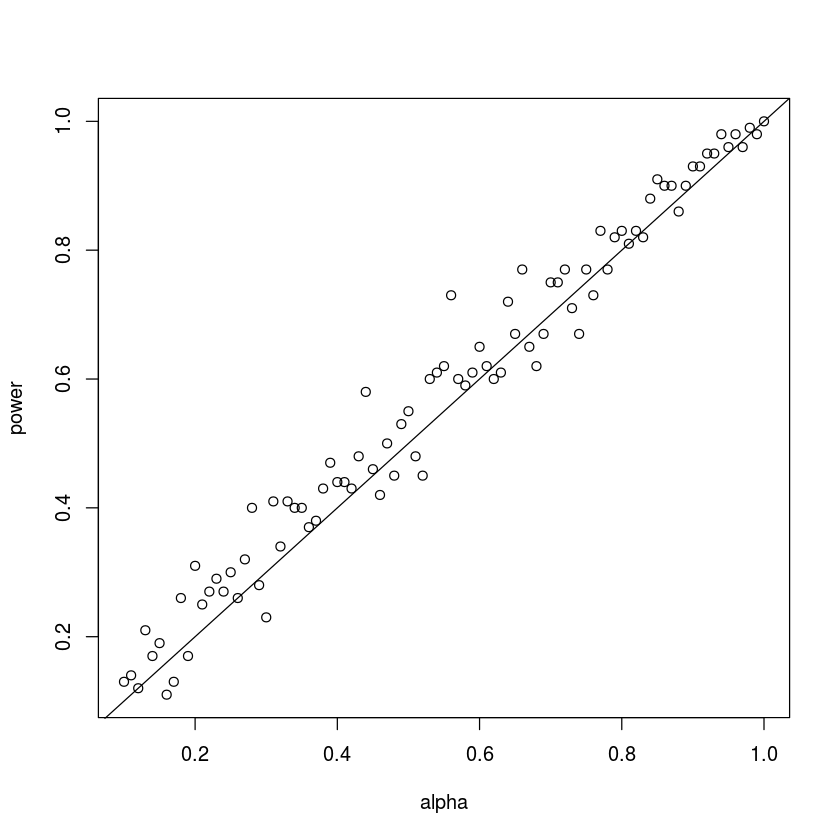

In [28]:
h1 <- rep(0, length(alphas))

for (j in 1:length(alphas)) {
  for (i in 1:100) {
    data <- rnorm(n, mean = a, sd = sd)
    res <- ks.test(data, "pnorm", mean = 0, sd = 1, alternative = "two.sided")
    if (res$p.value < alphas[j]) {
      h1[j] <- h1[j] + 1
    }
  }
}

plot(alphas, h1 / 100, xlab="alpha", ylab="power")
abline(0, 1)

### Односторонний (greater, a1 < a0)

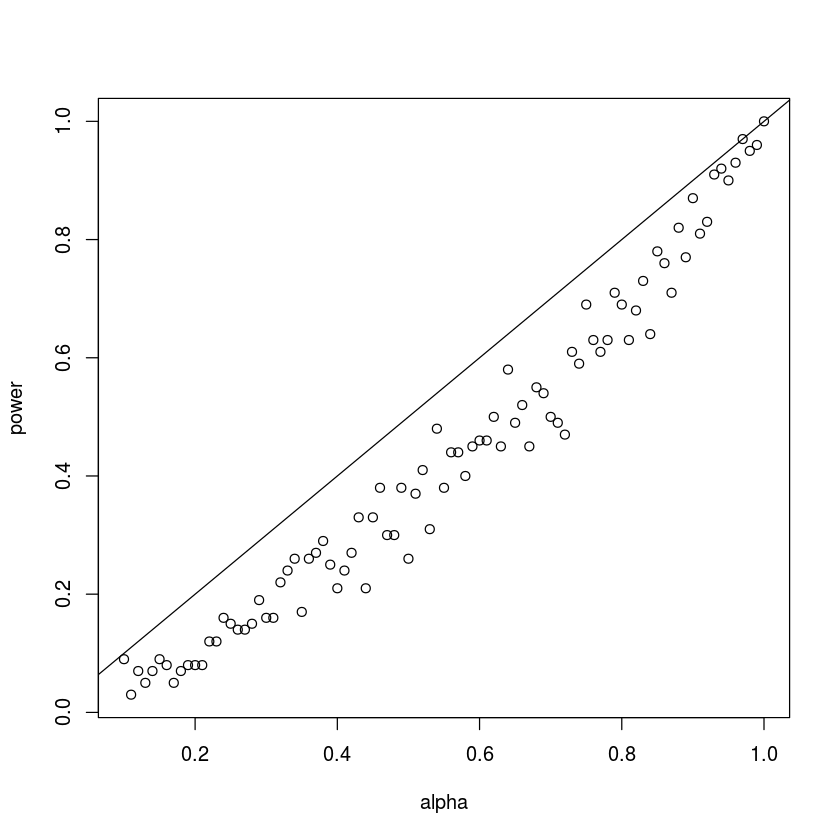

In [29]:
h1 <- rep(0, length(alphas))

for (j in 1:length(alphas)) {
  for (i in 1:100) {
    data <- rnorm(n, mean = a, sd = sd)
    res <- ks.test(data, "pnorm", mean = 0, sd = 1, alternative = "greater")
    if (res$p.value < alphas[j]) {
      h1[j] <- h1[j] + 1
    }
  }
}

plot(alphas, h1 / 100, xlab="alpha", ylab="power")
abline(0, 1)

### Односторонний (greater, a1 > a0)

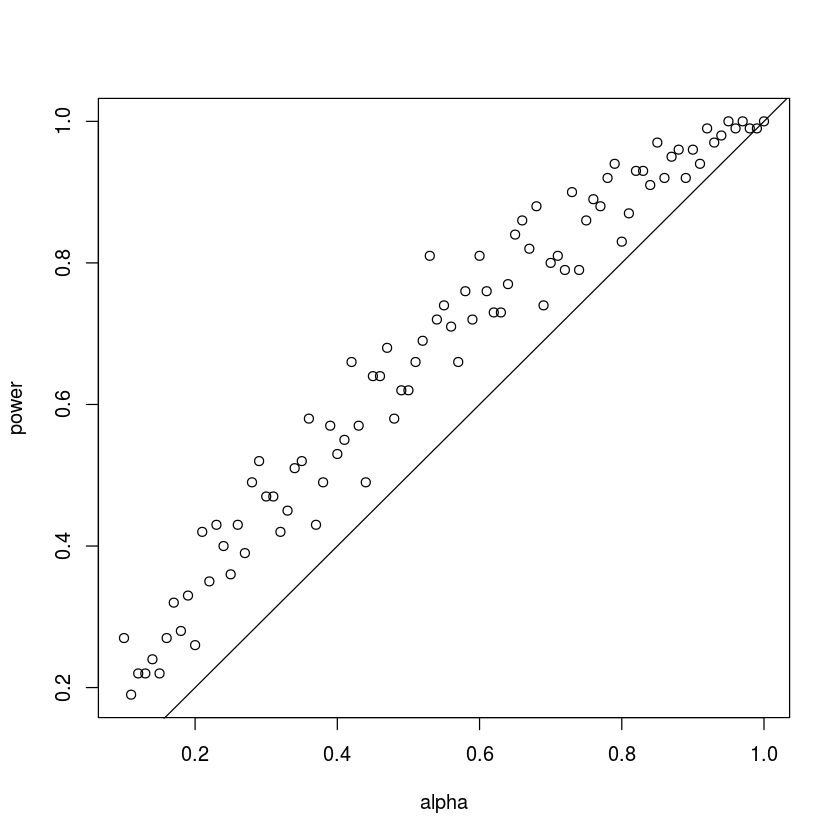

In [31]:
h1 <- rep(0, length(alphas))

for (j in 1:length(alphas)) {
  for (i in 1:100) {
    data <- rnorm(n, mean = a, sd = sd)
    res <- ks.test(data, "pnorm", mean = 0, sd = 1, alternative = "less")
    if (res$p.value < alphas[j]) {
      h1[j] <- h1[j] + 1
    }
  }
}

plot(alphas, h1 / 100, xlab="alpha", ylab="power")
abline(0, 1)a

При заданном уровне значимости, мощность(не совпадает с альтернативой) < мощность(совпадает, двусторонний) < мощность(совпадает, односторонний), что не противоречит здравому смыслу.

## Задание 4

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1333  0.7205  0.8693  0.8118  0.9528  1.0000 

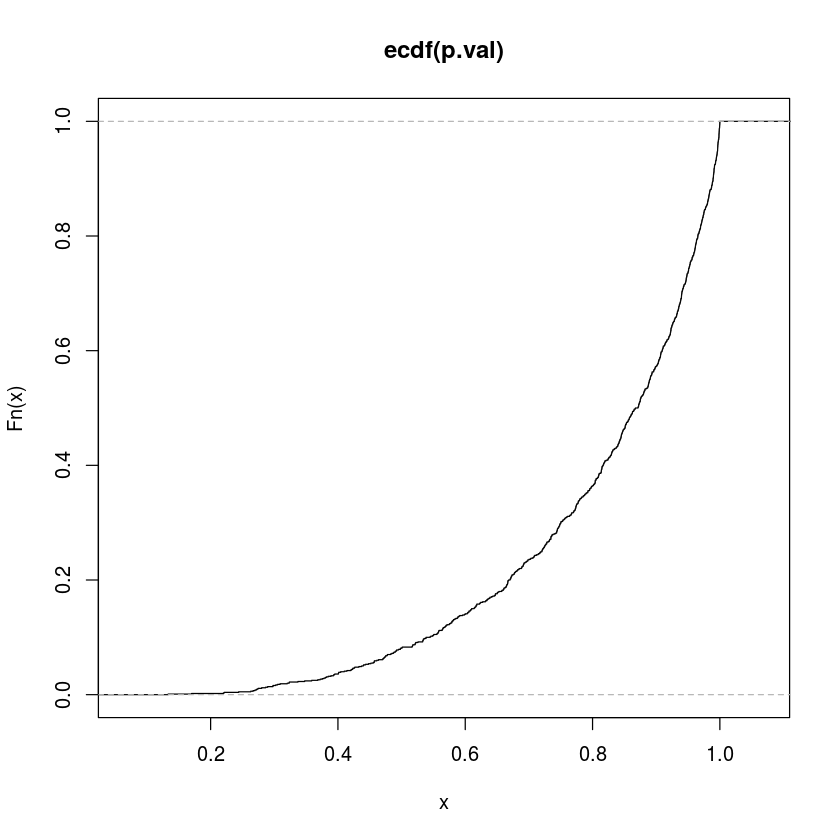

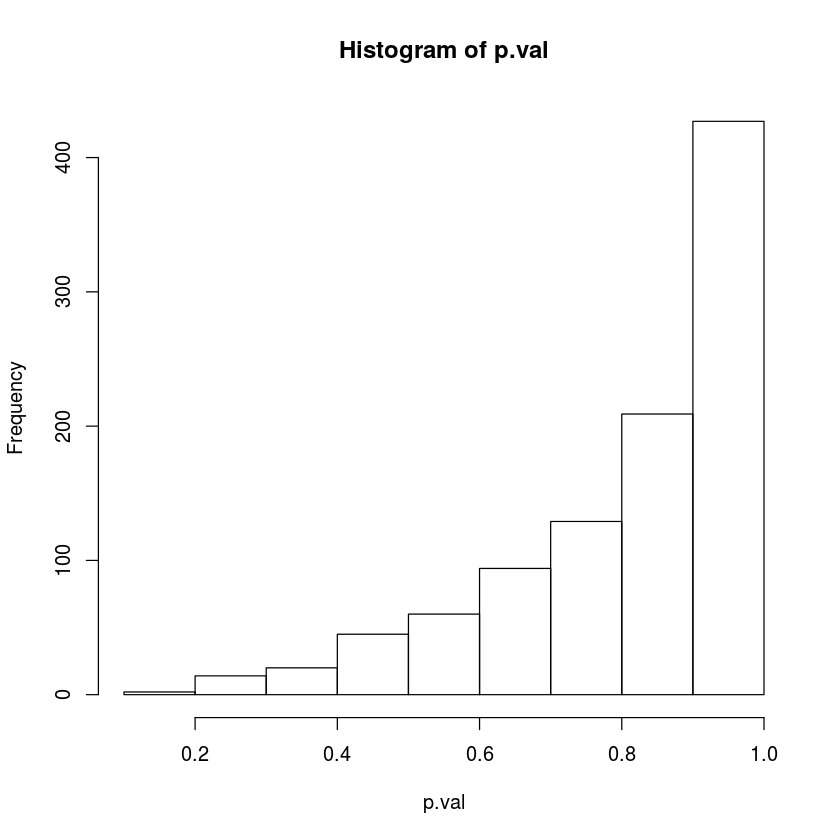

In [34]:
mean <- 0
sd <- 1
p.val <- rep(NA, 1000)

for(i in 1:1000) {
  data <- rnorm(100, mean = mean, sd = sd)
  res <- ks.test(data, "pnorm", mean = mean(data), sd = sd(data))
  p.val[i] <- res$p.value
}
summary(p.val)

plot(ecdf(p.val))
hist(p.val)

Вывод